In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing.image import  load_img

In [3]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'

In [4]:
img = load_img(fullname, target_size =(299,299))

In [5]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7FD1A45FBA90>


In [6]:
x = np.array(img)

# Pre-trained convolutional neural networks

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:
model = Xception(weights = 'imagenet', input_shape = (299,299,3))

2022-12-12 16:20:18.802035: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-12 16:20:18.804766: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 16:20:18.815212: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
X = np.array([x])
X_test = preprocess_input(X)

In [10]:
pred_test = model.predict(X_test)

2022-12-12 16:20:20.510072: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-12 16:20:20.527710: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


In [11]:
decode_predictions(pred_test)

[[('n03595614', 'jersey', 0.6819639),
  ('n02916936', 'bulletproof_vest', 0.038139865),
  ('n04370456', 'sweatshirt', 0.034324702),
  ('n03710637', 'maillot', 0.011354212),
  ('n04525038', 'velvet', 0.0018453546)]]

# Transfer learning

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_dataset = train_gen.flow_from_directory('./clothing-dataset-small/train',
                              target_size=(150,150),
                              batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

val_dataset = val_gen.flow_from_directory('./clothing-dataset-small/validation',
                              target_size=(150,150),
                              batch_size=32)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [17]:
base_model = Xception(weights = 'imagenet',
                      include_top = False,
                      input_shape = (150,150,3))

base_model.trainable = False
########################################################
inputs = keras.Input(shape=(150,150,3))
base = base_model(inputs, training = False)
#polling from 3D to 2D
vectors = keras.layers.GlobalAveragePooling2D()(base)
#adding dense layer
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs,outputs)
######################################################
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer = optimizer,
             loss = loss,
             metrics = ['accuracy'])

In [18]:
history = model.fit(train_dataset, epochs=3 , validation_data= val_dataset)

Epoch 1/3
96/96 [==============================] - 142s 1s/step - loss: 1.7498 - accuracy: 0.6010 - val_loss: 1.0288 - val_accuracy: 0.7361
Epoch 2/3
96/96 [==============================] - 254s 3s/step - loss: 0.5720 - accuracy: 0.8122 - val_loss: 0.9650 - val_accuracy: 0.7390
Epoch 3/3
96/96 [==============================] - 251s 3s/step - loss: 0.3922 - accuracy: 0.8695 - val_loss: 0.8110 - val_accuracy: 0.8152


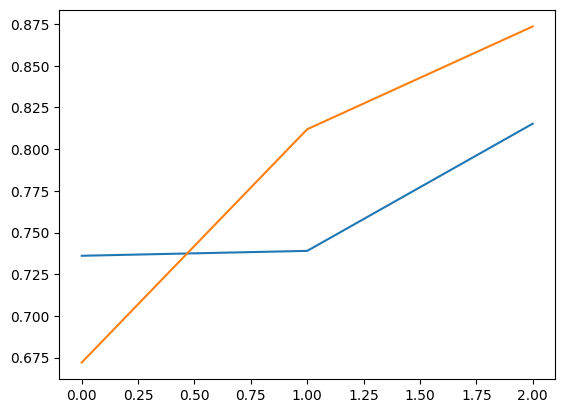

In [19]:
plt.plot(history.history['val_accuracy'], label = 'val')
plt.plot(history.history['accuracy'], label = 'acc')

# Playing with the learning rate

In [20]:
def make_learning_model(learning_rate = 0.01):
    base_model = Xception(weights = 'imagenet',
                      include_top = False,
                      input_shape = (150,150,3))

    base_model.trainable = False
    ########################################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    #polling from 3D to 2D
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    #adding dense layer
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs,outputs)
    ######################################################
    learning_rate = 0.01
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer = optimizer,
             loss = loss,
             metrics = ['accuracy'])
    
    return model

In [22]:
scores = {}

for lr in [0.001,0.01]:
    
    model = make_learning_model(lr)
    history = model.fit(train_dataset, epochs=3 , validation_data= val_dataset)
    scores[lr]= history.history

Epoch 1/3
96/96 [==============================] - 253s 3s/step - loss: 1.5606 - accuracy: 0.5768 - val_loss: 0.7361 - val_accuracy: 0.7595
Epoch 2/3
96/96 [==============================] - 299s 3s/step - loss: 0.5090 - accuracy: 0.8350 - val_loss: 0.8491 - val_accuracy: 0.7537
Epoch 3/3
96/96 [==============================] - 224s 2s/step - loss: 0.3053 - accuracy: 0.8944 - val_loss: 0.8550 - val_accuracy: 0.8152
Epoch 1/3
96/96 [==============================] - 188s 2s/step - loss: 1.5957 - accuracy: 0.5935 - val_loss: 0.7029 - val_accuracy: 0.7859
Epoch 2/3
96/96 [==============================] - 191s 2s/step - loss: 0.4701 - accuracy: 0.8448 - val_loss: 0.8243 - val_accuracy: 0.8035
Epoch 3/3
96/96 [==============================] - 191s 2s/step - loss: 0.3466 - accuracy: 0.8720 - val_loss: 0.7640 - val_accuracy: 0.7801


In [23]:
scores

{0.001: {'loss': [1.2692676782608032, 0.5325467586517334, 0.3267405331134796],
  'accuracy': [0.6619947552680969, 0.8288787603378296, 0.8868970274925232],
  'val_loss': [0.7360554337501526, 0.8490982055664062, 0.8549827933311462],
  'val_accuracy': [0.759530782699585, 0.7536656856536865, 0.8152492642402649]},
 0.01: {'loss': [1.1853283643722534, 0.5068850517272949, 0.35002845525741577],
  'accuracy': [0.6831812262535095, 0.8393089771270752, 0.8728813529014587],
  'val_loss': [0.7029424905776978, 0.8243384957313538, 0.7639963626861572],
  'val_accuracy': [0.7859237790107727, 0.803519070148468, 0.7800586223602295]}}

In [24]:
for hist in scores.keys():
    print(scores[hist]['val_accuracy'])

[0.759530782699585, 0.7536656856536865, 0.8152492642402649]
[0.7859237790107727, 0.803519070148468, 0.7800586223602295]


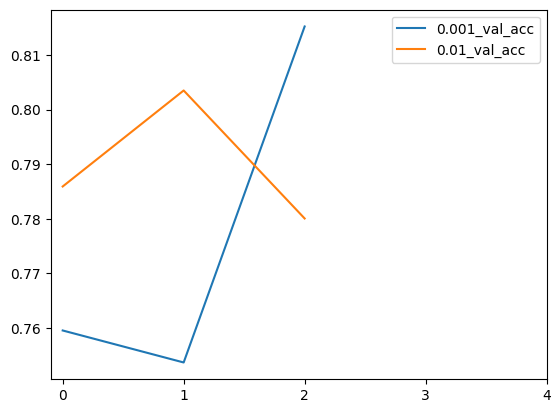

In [25]:
for hist in scores.keys():
    plt.plot(scores[hist]['val_accuracy'], label = f'{hist}_val_acc')
    
plt.xticks(np.arange(5))
plt.legend()

In [26]:
preds = model.predict(X)

ValueError: in user code:

    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/rollytiger/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_4: expected shape=(None, 150, 150, 3), found shape=(None, 299, 299, 3)


In [59]:
preds.shape

(32, 10)

# Adding more layers

In [29]:
def make_model(learning_rate = 0.01, size_inner = 100):
    
    base_model = Xception(weights = 'imagenet',
                      include_top = False,
                      input_shape = (150,150,3))

    base_model.trainable = False
    ########################################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    #polling from 3D to 2D
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    #adding inner layer
    inners = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    #adding dense layer
    outputs = keras.layers.Dense(10)(inners)
    model = keras.Model(inputs,outputs)
    ######################################################
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer = optimizer,
             loss = loss,
             metrics = ['accuracy'])
    
    return model

In [31]:
scores = {}

for size in [10,20,100]:
    
    model = make_model(size_inner = size)
    history = model.fit(train_dataset, epochs=3 , validation_data= val_dataset)
    scores[size]= history.history

Epoch 1/3
96/96 [==============================] - 239s 2s/step - loss: 1.7640 - accuracy: 0.3889 - val_loss: 1.0904 - val_accuracy: 0.6158
Epoch 2/3
96/96 [==============================] - 175s 2s/step - loss: 0.9870 - accuracy: 0.6452 - val_loss: 0.9200 - val_accuracy: 0.6833
Epoch 3/3
96/96 [==============================] - 137s 1s/step - loss: 0.8022 - accuracy: 0.7031 - val_loss: 0.8452 - val_accuracy: 0.6745
Epoch 1/3
96/96 [==============================] - 162s 2s/step - loss: 1.4263 - accuracy: 0.5058 - val_loss: 0.9385 - val_accuracy: 0.6745
Epoch 2/3
96/96 [==============================] - 166s 2s/step - loss: 0.7774 - accuracy: 0.7105 - val_loss: 0.7731 - val_accuracy: 0.7097
Epoch 3/3
96/96 [==============================] - 194s 2s/step - loss: 0.5695 - accuracy: 0.7939 - val_loss: 0.7326 - val_accuracy: 0.7419
Epoch 1/3
96/96 [==============================] - 163s 2s/step - loss: 1.5866 - accuracy: 0.5430 - val_loss: 0.8097 - val_accuracy: 0.7419
Epoch 2/3
96/96 [===

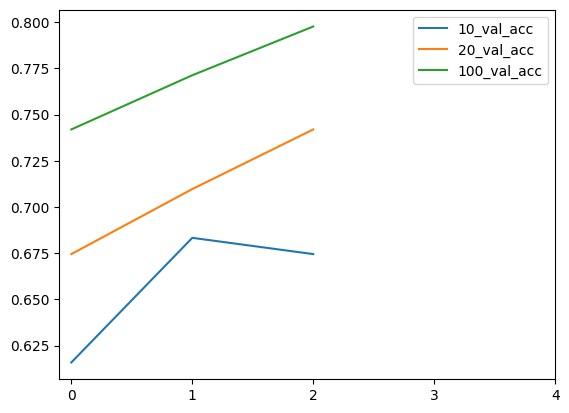

In [32]:
for hist in scores.keys():
    plt.plot(scores[hist]['val_accuracy'], label = f'{hist}_val_acc')
    
plt.xticks(np.arange(5))
plt.legend()

# Regularization
### Dropout random part of the inner layer

In [33]:
def make_model(learning_rate = 0.01, size_inner = 100, droprate = 0.5):
    
    base_model = Xception(weights = 'imagenet',
                      include_top = False,
                      input_shape = (150,150,3))

    base_model.trainable = False
    ########################################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    #polling from 3D to 2D
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    #adding inner layer
    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    #adding dense layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs,outputs)
    ######################################################
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer = optimizer,
             loss = loss,
             metrics = ['accuracy'])
    
    return model

In [34]:
scores = {}

for drop in [0.1,0.2,0.5]:
    
    model = make_model(droprate = drop)
    history = model.fit(train_dataset,
                        epochs=3 , 
                        validation_data= val_dataset)
    scores[drop]= history.history

Epoch 1/3
96/96 [==============================] - 334s 3s/step - loss: 1.7108 - accuracy: 0.5238 - val_loss: 0.7456 - val_accuracy: 0.7625
Epoch 2/3
96/96 [==============================] - 140s 1s/step - loss: 0.7025 - accuracy: 0.7545 - val_loss: 0.7090 - val_accuracy: 0.7625
Epoch 3/3
96/96 [==============================] - 138s 1s/step - loss: 0.6149 - accuracy: 0.7812 - val_loss: 0.7377 - val_accuracy: 0.7537
Epoch 1/3
96/96 [==============================] - 171s 2s/step - loss: 1.9837 - accuracy: 0.5078 - val_loss: 0.8112 - val_accuracy: 0.7155
Epoch 2/3
96/96 [==============================] - 211s 2s/step - loss: 0.8224 - accuracy: 0.7109 - val_loss: 0.7336 - val_accuracy: 0.7478
Epoch 3/3
96/96 [==============================] - 269s 3s/step - loss: 0.6788 - accuracy: 0.7449 - val_loss: 0.6674 - val_accuracy: 0.7947
Epoch 1/3
96/96 [==============================] - 254s 3s/step - loss: 2.0718 - accuracy: 0.4310 - val_loss: 1.0452 - val_accuracy: 0.6100
Epoch 2/3
96/96 [===

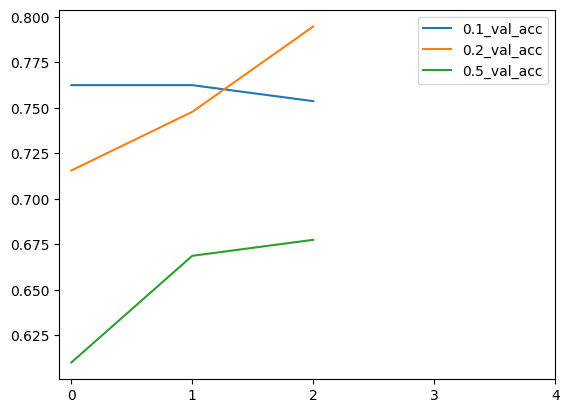

In [35]:
for hist in scores.keys():
    plt.plot(scores[hist]['val_accuracy'], label = f'{hist}_val_acc')
    
plt.xticks(np.arange(5))
plt.legend()

# Data Augmentation

In [36]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
                               shear_range = 10,
                               zoom_range = 0.1,
                               vertical_flip = True                               
                              )

train_dataset = train_gen.flow_from_directory('./clothing-dataset-small/train',
                              target_size=(150,150),
                              batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

val_dataset = val_gen.flow_from_directory('./clothing-dataset-small/validation',
                              target_size=(150,150),
                              batch_size=32)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [37]:
def make_model(learning_rate = 0.01, size_inner = 100, droprate = 0.5):
    
    base_model = Xception(weights = 'imagenet',
                      include_top = False,
                      input_shape = (150,150,3))

    base_model.trainable = False
    ########################################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    #polling from 3D to 2D
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    #adding inner layer
    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    #adding dense layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs,outputs)
    ######################################################
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer = optimizer,
             loss = loss,
             metrics = ['accuracy'])
    
    return model

In [38]:
learning_rate = 0.01
size_inner = 100
droprate = 0.2
    
model = make_model(learning_rate = learning_rate,
                   size_inner = size_inner,
                   droprate = droprate)

history = model.fit(train_dataset,
                    epochs=10 , 
                    validation_data= val_dataset)

Epoch 1/10
96/96 [==============================] - 225s 2s/step - loss: 2.6091 - accuracy: 0.4122 - val_loss: 0.9016 - val_accuracy: 0.6891
Epoch 2/10
96/96 [==============================] - 255s 3s/step - loss: 1.1401 - accuracy: 0.6137 - val_loss: 0.8061 - val_accuracy: 0.7155
Epoch 3/10
96/96 [==============================] - 268s 3s/step - loss: 1.0583 - accuracy: 0.6438 - val_loss: 0.9682 - val_accuracy: 0.6950
Epoch 4/10
96/96 [==============================] - 225s 2s/step - loss: 1.0045 - accuracy: 0.6595 - val_loss: 0.8259 - val_accuracy: 0.7331
Epoch 5/10
96/96 [==============================] - 231s 2s/step - loss: 0.9356 - accuracy: 0.6772 - val_loss: 0.8201 - val_accuracy: 0.7243
Epoch 6/10
96/96 [==============================] - 272s 3s/step - loss: 0.8987 - accuracy: 0.6920 - val_loss: 0.7593 - val_accuracy: 0.7273
Epoch 7/10
96/96 [==============================] - 278s 3s/step - loss: 0.9115 - accuracy: 0.6789 - val_loss: 0.7131 - val_accuracy: 0.7566
Epoch 8/10
96

# Training larger model

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [41]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
                               shear_range = 10,
                               zoom_range = 0.1,
                               horizontal_flip = True                               
                              )

train_dataset = train_gen.flow_from_directory('./clothing-dataset-small/train',
                              target_size=(299,299),
                              batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

val_dataset = val_gen.flow_from_directory('./clothing-dataset-small/validation',
                              target_size=(299,299),
                              batch_size=32)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [43]:
checkpoint = keras.callbacks.ModelCheckpoint(
                    'model_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
                     save_best_only= True,
                     monitor = 'val_accuracy',
                     mode = 'max')

In [44]:
def make_model(learning_rate = 0.01, size_inner = 100, droprate = 0.5, picsize = 150):
    
    base_model = Xception(weights = 'imagenet',
                      include_top = False,
                      input_shape = (picsize,picsize,3))

    base_model.trainable = False
    ########################################################
    inputs = keras.Input(shape=(picsize,picsize,3))
    base = base_model(inputs, training = False)
    #polling from 3D to 2D
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    #adding inner layer
    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    #adding dense layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs,outputs)
    ######################################################
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer = optimizer,
             loss = loss,
             metrics = ['accuracy'])
    
    return model

In [45]:
learning_rate = 0.01
size_inner = 100
droprate = 0.2
picsize = 299
    
model = make_model(learning_rate = learning_rate,
                   size_inner = size_inner,
                   droprate = droprate,
                   picsize = 299)

history = model.fit(train_dataset,
                    epochs=10 , 
                    validation_data= val_dataset,
                    callbacks = [checkpoint])

Epoch 1/10
96/96 [==============================] - 838s 9s/step - loss: 1.0664 - accuracy: 0.6340 - val_loss: 0.4809 - val_accuracy: 0.8240
Epoch 2/10
96/96 [==============================] - 668s 7s/step - loss: 0.4936 - accuracy: 0.8331 - val_loss: 0.5426 - val_accuracy: 0.8358
Epoch 3/10
28/96 [=======>......................] - ETA: 6:30 - loss: 0.4550 - accuracy: 0.8277

KeyboardInterrupt: 

# Using the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [3]:
model = keras.models.load_model('model_v4_02_0.836.h5')

2022-12-12 23:11:12.286690: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-12 23:11:12.288170: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 23:11:12.312836: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
test_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

test_dataset = test_gen.flow_from_directory('./clothing-dataset-small/test',
                              target_size=(299,299),
                              batch_size=32)

Found 372 images belonging to 10 classes.


In [6]:
model.evaluate(test_dataset)

2022-12-12 23:11:23.990611: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-12 23:11:23.994788: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


12/12 [==============================] - 70s 6s/step - loss: 0.5070 - accuracy: 0.8333


[0.5069997906684875, 0.8333333134651184]

## test on 1 image

In [7]:
from tensorflow.keras.preprocessing.image import  load_img

In [8]:
path = './clothing-dataset-small/test/pants'
name = 'c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
test_name = f'{path}/{name}'

In [9]:
img = load_img(test_name, target_size =(299,299))

In [10]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)

In [12]:
model.predict(X)

array([[ -5.8914843,  -8.969754 ,  -1.8140615,  -4.6808305,  14.627853 ,
         -5.245239 , -10.7146   ,   8.555802 ,  -0.7367655,  -8.37192  ]],
      dtype=float32)